In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\totol\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\totol\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\totol\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
pip install seaborn

You should consider upgrading via the 'c:\Users\totol\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [5]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\totol\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [6]:
pip install chardet

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\totol\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [7]:
pip install python-Levenshtein

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\totol\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [8]:
pip install scikitlearn

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement scikitlearn (from versions: none)
ERROR: No matching distribution found for scikitlearn
You should consider upgrading via the 'c:\Users\totol\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [9]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\totol\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [10]:
import pandas as pd
import numpy as np
import itertools
from itertools import groupby
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20,10)
import seaborn as sns
import fuzzywuzzy
from fuzzywuzzy import process
import chardet
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [11]:
df = pd.read_csv('c:\\Users\\totol\\Downloads\\car_price.csv')

In [12]:
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [13]:
df.shape

(5512, 10)

In [14]:
discrete_cols = df[['car_name','fuel_type','transmission','ownership','manufacture','engine','Seats']]

In [15]:
unique_values = discrete_cols.nunique()
print(unique_values)

car_name        1896
fuel_type          5
transmission       2
ownership          6
manufacture       26
engine           139
Seats              6
dtype: int64


In [16]:
df.isna().sum()

Unnamed: 0             0
car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

In [17]:
df.dtypes

Unnamed: 0              int64
car_name               object
car_prices_in_rupee    object
kms_driven             object
fuel_type              object
transmission           object
ownership              object
manufacture             int64
engine                 object
Seats                  object
dtype: object

In [80]:
df1 = df.drop(['Unnamed: 0'],axis='columns')
df1.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [81]:
Lakh_count = df1['car_prices_in_rupee'].str.endswith('Lakh').unique().sum()

In [82]:
print(Lakh_count)

1


In [83]:
KM_count = df1['kms_driven'].str.endswith('kms').unique().sum()
print(KM_count)

1


In [84]:
df1['fuel_type'].unique()

array(['Diesel', 'Petrol', 'Cng', 'Electric', 'Lpg'], dtype=object)

In [85]:
df1['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [86]:
df1['ownership'].unique()

array(['1st Owner', '2nd Owner', '3rd Owner', '4th Owner', '5th Owner',
       '0th Owner'], dtype=object)

In [87]:
df1['manufacture'].unique()

array([2017, 2021, 2016, 2018, 2015, 2014, 2020, 2019, 2012, 2008, 2013,
       2022, 2010, 2005, 2009, 2006, 2011, 2007, 2002, 2004, 1998, 2003,
       1995, 2000, 2001, 1999], dtype=int64)

In [88]:
df1.tail()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
5507,BMW X1 sDrive 20d xLine,28.90 Lakh,"45,000 kms",Diesel,Automatic,1st Owner,2018,2995 cc,7 Seats
5508,BMW M Series M4 Coupe,64.90 Lakh,"29,000 kms",Petrol,Automatic,2nd Owner,2015,1968 cc,5 Seats
5509,Jaguar XF 2.2 Litre Luxury,13.75 Lakh,"90,000 kms",Diesel,Automatic,2nd Owner,2013,2755 cc,5 Seats
5510,BMW 7 Series 730Ld,29.90 Lakh,"79,000 kms",Diesel,Automatic,3rd Owner,2015,2967 cc,6 Seats
5511,BMW 5 Series 520d M Sport,31.90 Lakh,"42,000 kms",Diesel,Automatic,2nd Owner,2017,1991 cc,5 Seats


In [89]:
def prefix_before_space(s):
    return s.split(" ")[0]

In [90]:
car_brand = df1['car_name']

In [91]:
grouped_car_names = groupby(sorted(car_brand, key=prefix_before_space), key=prefix_before_space)

In [92]:
for prefix, group in grouped_car_names:
    print(f"{prefix}: {len(list(group))}")

Audi: 166
BMW: 172
Bentley: 1
Chevrolet: 82
Datsun: 25
Fiat: 17
Force: 1
Ford: 168
Honda: 498
Hyundai: 1023
Isuzu: 4
Jaguar: 30
Jeep: 49
Kia: 61
Land: 50
Lexus: 10
MG: 62
Mahindra: 315
Maruti: 1389
Maserati: 5
Mercedes-Benz: 283
Mini: 14
Mitsubishi: 8
Nissan: 63
Porsche: 10
Premier: 1
Renault: 170
Skoda: 113
Tata: 269
Toyota: 263
Volkswagen: 159
Volvo: 31


In [93]:
df1.dtypes

car_name               object
car_prices_in_rupee    object
kms_driven             object
fuel_type              object
transmission           object
ownership              object
manufacture             int64
engine                 object
Seats                  object
dtype: object

In [95]:
def strip_after_space(string):
    return string.split(" ")[0]

In [97]:
df1[['kms_driven','ownership','engine','Seats']] = df1[['kms_driven','ownership','engine','Seats']].applymap(strip_after_space)
df1.tail()


,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
5507,BMW X1 sDrive 20d xLine,28.90 Lakh,"45,000",Diesel,Automatic,1st,2018,2995,7
5508,BMW M Series M4 Coupe,64.90 Lakh,"29,000",Petrol,Automatic,2nd,2015,1968,5
5509,Jaguar XF 2.2 Litre Luxury,13.75 Lakh,"90,000",Diesel,Automatic,2nd,2013,2755,5
5510,BMW 7 Series 730Ld,29.90 Lakh,"79,000",Diesel,Automatic,3rd,2015,2967,6
5511,BMW 5 Series 520d M Sport,31.90 Lakh,"42,000",Diesel,Automatic,2nd,2017,1991,5


In [98]:
df1['ownership'] = df1['ownership'].str[0].str.extract('(\d+)', expand=False)
df1.tail()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
5507,BMW X1 sDrive 20d xLine,28.90 Lakh,"45,000",Diesel,Automatic,1,2018,2995,7
5508,BMW M Series M4 Coupe,64.90 Lakh,"29,000",Petrol,Automatic,2,2015,1968,5
5509,Jaguar XF 2.2 Litre Luxury,13.75 Lakh,"90,000",Diesel,Automatic,2,2013,2755,5
5510,BMW 7 Series 730Ld,29.90 Lakh,"79,000",Diesel,Automatic,3,2015,2967,6
5511,BMW 5 Series 520d M Sport,31.90 Lakh,"42,000",Diesel,Automatic,2,2017,1991,5


In [32]:
numerical_columns = []
categorical_columns = []
for col in df1.columns:
    if df1[col].dtype == object:
        categorical_columns.append(col)
    else:
        numerical_columns.append(col)
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['manufacture']
Categorical Columns: ['car_name', 'car_prices_in_rupee', 'kms_driven', 'fuel_type', 'transmission', 'ownership', 'engine', 'Seats']


C:\Users\totol\AppData\Local\Temp\ipykernel_13316\191441348.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df1.corr()


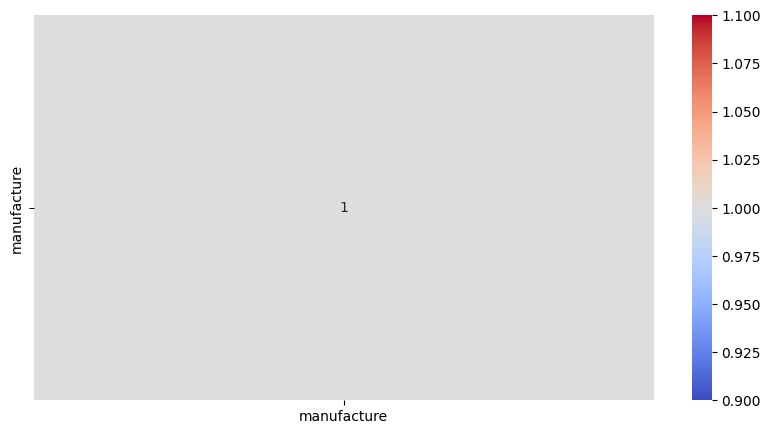

In [33]:
plt.figure(figsize=(10, 5))
correlations = df1.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()